In [1]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-19 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART13_Annotation_MP'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

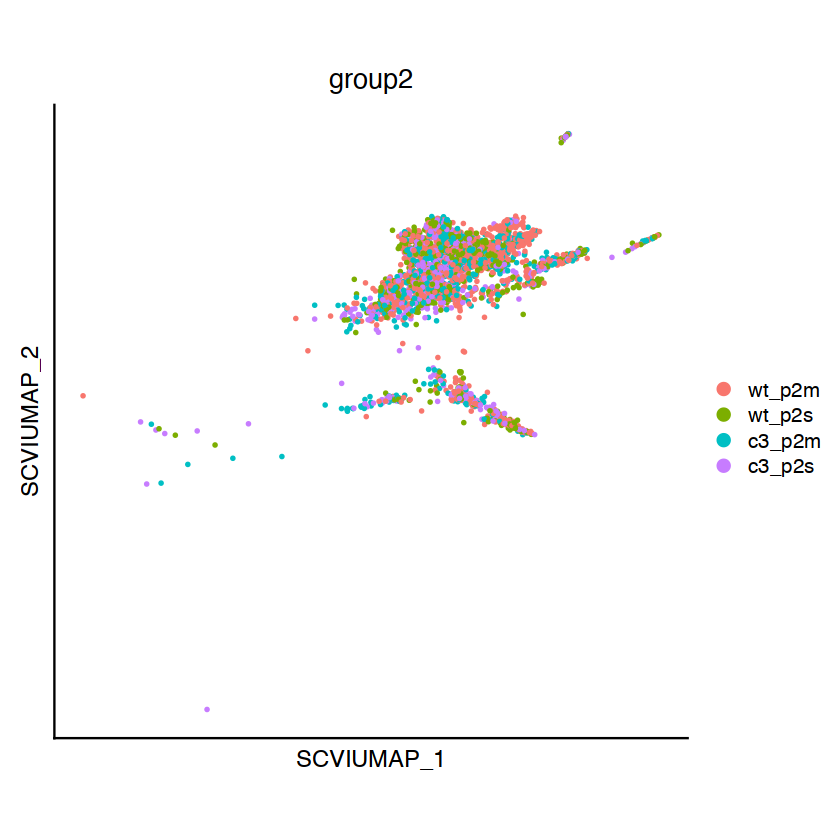

In [2]:
plan("multisession", workers = 8)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Excitatory Neuron annotation  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
sub.srt <- srt[, srt$Cell_type %in% c('Immune')]
DimPlot2(sub.srt, group.by = 'group2')
mycol_sample <- mycol_10[1:4]

In [3]:
## Re-embed by scVI
sub.srt <- RunUMAP(sub.srt, reduction = 'scVI', dims = 1:50,
                  reduction.name = 'sub_scVI_umap', reduction.key = 'subSCVIUMAP_', verbose = FALSE)
sub.srt <- FindNeighbors(sub.srt, dims = 1:50, reduction = 'scVI', force.recalc = T, verbose = FALSE) %>%
        FindClusters(resolution = seq(0.1, 1, 0.1), verbose = FALSE)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


In [4]:
p <- list(
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'group2', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Doublet_SC', raster = T, pt.size = 0.2),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'Cell_type', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.1', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.2', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.3', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.4', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.5', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.6', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.7', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.8', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.0.9', raster = T, pt.size = 0.2, label = T),
  DimPlot2(sub.srt, reduction = 'sub_scVI_umap', group.by = 'RNA_snn_res.1', raster = T, pt.size = 0.2, label = T)
)
p <- wrap_plots(p, nrow = 4)
PlotPDF('1.0.umap.clusters', 20, 20)
p
dev.off()

pdf 
  2

In [5]:
DefaultAssay(srt) <- 'RNA'

In [6]:
p <- FeaturePlot2(sub.srt, features = c("Eno1","Crabp1","Pclaf","Tnni1","Myh7","Gyg","Myh6","Nppa","Tcap","Gsn",
                               "Dcn","Lum","Upk3b","Msln","C3","Plvap","Npr3","Ednrb","Gpihbp1","Ly6c1",
                               "Cd36","Ccl21a","Mmrn1","Lyve1","Rgs5","Kcnj8","Vtn","Acta2","Tagln","Myh11",
                               "Igkc","Ighm","Cd79a","Trac","Cd3e","Cd3d","Gzma","Ccl5","Nkg7","Xcl1","Klrk1","Cd7",
                               "S100a8","S100a9","Retnlg","Plac8","Chil3","Ms4a4c","C1qa","Mrc1","F13a1","Naaa","Cst3",
                               "Cd209a","Hbb-y","Hbb-bs","Hba-a1","Car2","Tmem14c","Mt2","Ppbp","Ctla2a","Nrgn","Prnp",
                               "Plp1","Apod","Stmn2","Nefl","Gap43","Car3","Cfd","Pck1","Alb","Apoa2","Fabp1"), 
                                ncol = 5, reduction = 'sub_scVI_umap')
PlotPDF('1.5.feat.markers', 25, 60)
print(p)
dev.off()

Warning message in FeaturePlot(srt_obj, features = features, pt.size = pt.size, :
"All cells have the same value (0) of Crabp1."
Warning message in FeaturePlot(srt_obj, features = features, pt.size = pt.size, :
"All cells have the same value (0) of Hbb-y."
Warning message in FeaturePlot(srt_obj, features = features, pt.size = pt.size, :
"All cells have the same value (0) of Fabp1."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, 

pdf 
  2

In [7]:
## Annotate
Idents(sub.srt) <- 'RNA_snn_res.0.3'
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('1.1.heat.marker_all_cluster', 15, 15)
p
dev.off()

PlotPDF('1.2.dim.all_cluster', 10, 10)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)
dev.off()

PlotPDF('1.3.bar.doublet_in_all_cluster', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'RNA_snn_res.0.3', stack.var = 'Doublet_SC', percentage = T)
dev.off()

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

pdf 
  2

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(stack.var)

  # Now:
  data %>% select(all_of(stack.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(group.var)

  # Now:
  data %>% select(all_of(group.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 18 × 3
# Groups:   StackVar [2]
   StackVar GroupVar Count
   <lgl>    <fct>    <int>
 1 FALSE    0          184
 2 FALSE    1          748
 3 FALSE    2          299
 4 FALSE    3          241
 5 FALSE    4          229
 6 FALSE    5          113
 7 FALSE    6          132
 8 FALSE    7           85
 9 FALSE    8           24
10 TRUE     0          649
11 TRUE     1           44
12 TRUE     2           48
13 TRUE     3           39
14 TRUE     4           20
15 TRUE     5           84
16 TRUE     6           48
17 TRUE     7           29
18 TRUE     8            4


pdf 
  2

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Score_Doublet"


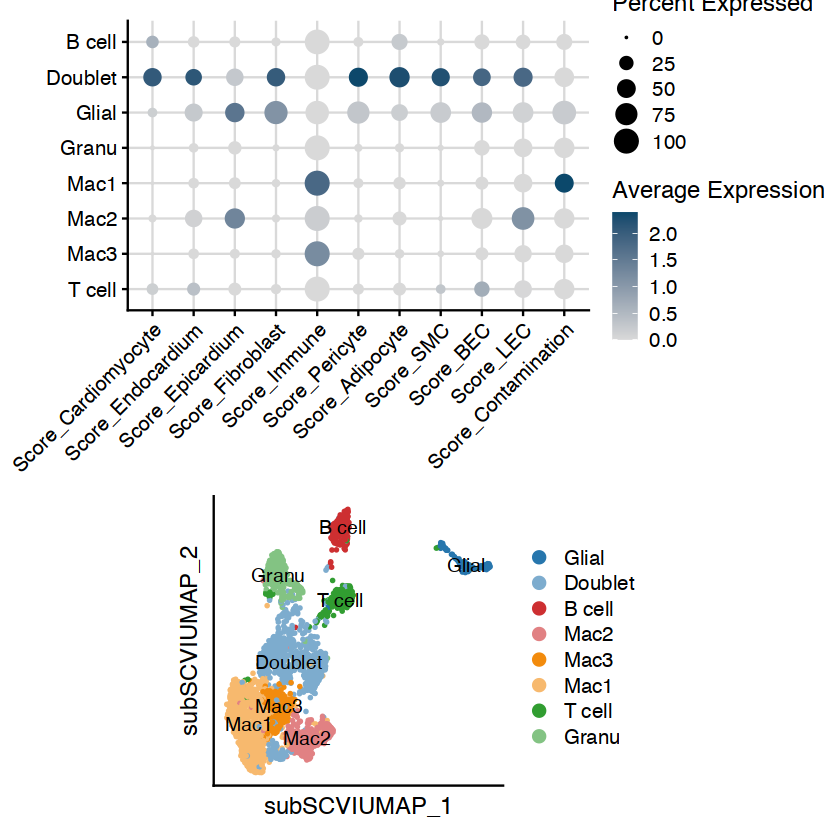

In [8]:
## Re-annotate
#Idents(sub.srt) <- 'RNA_snn_res.0.3'

sub.srt$Cell_state <- NA

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(1)] <- 'Mac1'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(2)] <- 'Mac2'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(4)] <- 'Mac3'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(3)] <- 'Granu'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(5)] <- 'T cell'

sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(6)] <- 'B cell'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(7,8)] <- 'Glial'
sub.srt$Cell_state[sub.srt$RNA_snn_res.0.3 %in% c(0)] <- 'Doublet'


Idents(sub.srt) <- 'Cell_state'
DotPlot2(sub.srt, features = paste0('Score_', levels(sub.srt$Cell_type)), group.by = 'Cell_state', col.min = 0) /
        DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = mycol_20)

In [9]:
gl <- Table(srt$Cell_type)
p <- FeaturePlot2(sub.srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5)
PlotPDF('1.4.feat.cell_type_score', 30, 20)
p
dev.off()

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Score_Doublet"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will 

pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`




 B cell Doublet   Glial   Granu    Mac1    Mac2    Mac3  T cell 
    180     833     142     280     792     347     249     197 

pdf 
  2

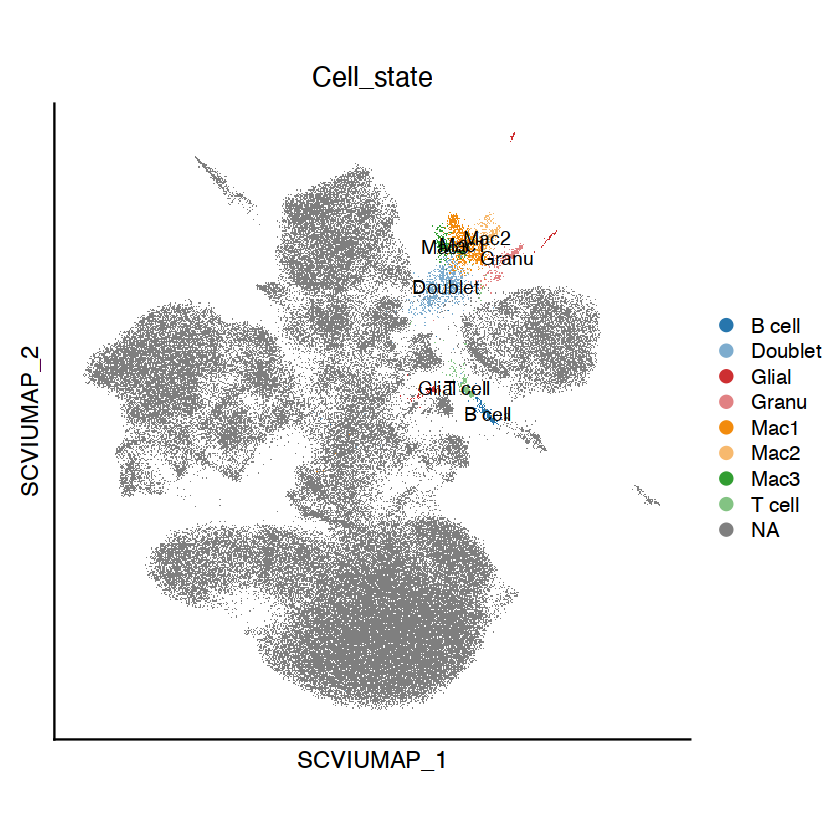

In [10]:
srt$Cell_state <- NA
srt$Cell_state[Cells(sub.srt)] <- sub.srt$Cell_state
DimPlot2(srt, reduction = 'scVI_umap', label = T, cols = mycol_20, group.by = 'Cell_state')

Table(sub.srt$Cell_state)


sub.srt$Cell_state <- factor(sub.srt$Cell_state, levels = c(
        'Mac1',
        'Mac2',
        'Mac3',
        'T cell',
        'B cell',
        'Granu',
        'Glial',
        'Doublet'
))
Idents(sub.srt) <- 'Cell_state'
  
PlotPDF('2.dim.all_cluster_annotated', 8, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state')
dev.off()

In [11]:
mk <- FindAllMarkers(sub.srt, only.pos = T, return.thresh = 0.01, logfc.threshold = 0.25)
mk <- mk[mk$p_val_adj < 0.01, ]
p <- MarkerHeatmap(sub.srt, mk, n_cells = 500, top = 10)
PlotPDF('3.heat.maker_all_cluster', 15, 15)
p
dev.off()

WriteCSV(mk, title = 'cell_subtype_markers')

Calculating cluster Mac1

Calculating cluster Mac2

Calculating cluster Mac3

Calculating cluster T cell

Calculating cluster B cell

Calculating cluster Granu

Calculating cluster Glial

Calculating cluster Doublet

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


pdf 
  2

In [12]:
## Re-embed without ambiguous cells
fb.srt <- sub.srt
fb.srt2 <- fb.srt[, fb.srt$Cell_state != 'Doublet']
fb.srt2 <- RunUMAP(fb.srt2, reduction = 'scVI', dims = 1:50, min.dist = 0.5,
                   reduction.name = 'sub_clean_scVI_umap', reduction.key = 'subcleanSCVIUMAP_', verbose = FALSE)
fb.srt@reductions$sub_clean_scVI_umap <- fb.srt@reductions$sub_scVI_umap
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[, c(1,2)] <- NA
fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings[Cells(fb.srt2), c(1,2)] <-
        fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings
colnames(fb.srt@reductions$sub_clean_scVI_umap@cell.embeddings) <-
        colnames(fb.srt2@reductions$sub_clean_scVI_umap@cell.embeddings)
fb.srt@reductions$sub_clean_scVI_umap@key <- fb.srt2@reductions$sub_clean_scVI_umap@key
PlotPDF('4.umap.Re_embed_annotated_reembed', 6, 6)
DimPlot2(fb.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)
dev.off()
sub.srt <- fb.srt

Warning message:
"Removed 833 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


pdf 
  2

In [13]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
saveRDS(sub.srt, 'integrated/PART13.immune_cells.srt.rds')

In [14]:
sub.srt <- DietSeurat(sub.srt, dimreducs = 'sub_scVI_umap', assay = 'RNA')
SaveH5ad(sub.srt, path = 'integrated/', name = 'PART13.annotated_immune.gex.ann',
         assay = 'RNA', raw_count_only = T, verbose = T)

## Following code is for avoiding "_index" in adata.var bug
suppressMessages(library('anndata'))
adata <- read_h5ad('integrated/PART13.annotated_immune.gex.ann.h5ad')
adata$raw <- NULL
adata$write_h5ad(filename = 'integrated/PART13.annotated_immune.gex.ann.h5ad') ## replace the original
adata$X[1:10, 1:20]
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Raw matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:CTTGATTAGGTTGGAC-1', '2023_NeoC3KO_RLi:P01_S001:ATGGTTGTCGTGAGAG-1', '2023_NeoC3KO_RLi:P01_S001:TATGTTCAGACGGATC-1' ... ]]



                                  
Xkr4          12 . . . . 3 . . . .
Gm1992         2 . . . . . . . . .
Gm19938        . . . . . . . . . .
Gm37381        . . . . . . . . . .
Rp1            . . . . 2 . . . . 1
Sox17          . . . . . . . . . .
Gm37587        . . . . . . . . . .
Gm37323        . . . . . . . . . .
Mrpl15         . . 2 . . . . . . 1
Lypla1         . . . . . 2 . 2 . .
Tcea1          . . 4 . 1 2 . . . .
Rgs20          . . . . . . . . . .
Atp6v1h        1 3 3 . 2 1 2 5 2 .
Rb1cc1         . 3 . 1 3 1 2 1 2 .
4732440D04Rik  . . 4 . . . . . 1 .
Alkal1         . . . . . . . . . .
St18           . . . . . . . . 1 .
Pcmtd1         1 1 4 1 4 2 2 4 . .
Gm26901        . . . . . . . . . .
Gm30414        . . 1 . . . . . . .


Data matrix:



20 x 10 sparse Matrix of class "dgCMatrix"


  [[ suppressing 10 column names '2023_NeoC3KO_RLi:P01_S001:CTTGATTAGGTTGGAC-1', '2023_NeoC3KO_RLi:P01_S001:ATGGTTGTCGTGAGAG-1', '2023_NeoC3KO_RLi:P01_S001:TATGTTCAGACGGATC-1' ... ]]



                                  
Xkr4          12 . . . . 3 . . . .
Gm1992         2 . . . . . . . . .
Gm19938        . . . . . . . . . .
Gm37381        . . . . . . . . . .
Rp1            . . . . 2 . . . . 1
Sox17          . . . . . . . . . .
Gm37587        . . . . . . . . . .
Gm37323        . . . . . . . . . .
Mrpl15         . . 2 . . . . . . 1
Lypla1         . . . . . 2 . 2 . .
Tcea1          . . 4 . 1 2 . . . .
Rgs20          . . . . . . . . . .
Atp6v1h        1 3 3 . 2 1 2 5 2 .
Rb1cc1         . 3 . 1 3 1 2 1 2 .
4732440D04Rik  . . 4 . . . . . 1 .
Alkal1         . . . . . . . . . .
St18           . . . . . . . . 1 .
Pcmtd1         1 1 4 1 4 2 2 4 . .
Gm26901        . . . . . . . . . .
Gm30414        . . 1 . . . . . . .


Scaled Data matrix:

No scaled data slot

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

Adding variable features for RNA

Adding feature-level metadata for RNA

Adding cell embeddings for sub_scVI_umap

No loadings for sub_scVI_umap

No projected loadings for sub_scVI_umap

No standard deviations for sub_scVI_umap

No JackStraw data for sub_scVI_umap

Validating h5Seurat file

Adding data from RNA as X

Transfering meta.features to var

Adding counts from RNA as raw

Transfering meta.features to raw/var

Transfering meta.data to obs

Adding dimensional reduction information for sub_scVI_umap



None

  [[ suppressing 20 column names 'Xkr4', 'Gm1992', 'Gm19938' ... ]]



10 x 20 sparse Matrix of class "dgTMatrix"
                                                                               
2023_NeoC3KO_RLi:P01_S001:CTTGATTAGGTTGGAC-1 12 2 . . . . . . . . . . 1 . . . .
2023_NeoC3KO_RLi:P01_S001:ATGGTTGTCGTGAGAG-1  . . . . . . . . . . . . 3 3 . . .
2023_NeoC3KO_RLi:P01_S001:TATGTTCAGACGGATC-1  . . . . . . . . 2 . 4 . 3 . 4 . .
2023_NeoC3KO_RLi:P01_S001:TTACGTTGTTGCAACT-1  . . . . . . . . . . . . . 1 . . .
2023_NeoC3KO_RLi:P01_S001:CTACTATCATCATTTC-1  . . . . 2 . . . . . 1 . 2 3 . . .
2023_NeoC3KO_RLi:P01_S001:TGAGGAGGTGTGGTCC-1  3 . . . . . . . . 2 2 . 1 1 . . .
2023_NeoC3KO_RLi:P01_S001:CCCATTGTCTCGGTCT-1  . . . . . . . . . . . . 2 2 . . .
2023_NeoC3KO_RLi:P01_S001:TTCATGTAGCCATTTG-1  . . . . . . . . . 2 . . 5 1 . . .
2023_NeoC3KO_RLi:P01_S001:GCAGGCTCAGAGCCCT-1  . . . . . . . . . . . . 2 2 1 . 1
2023_NeoC3KO_RLi:P01_S001:TCCTCCCGTCAGGTAG-1  . . . . 1 . . . 1 . . . . . . . .
                                                  
2023_NeoC3KO_RLi:P01_S001:

In [15]:
sub.srt <- readRDS(file = 'integrated/PART13.immune_cells.srt.rds')
sub.srt <- sub.srt[, !sub.srt$Cell_state %in% c('Doublet')]

In [16]:
PlotPDF('4.1.0.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'Cell_state', stack.var = 'group1', percentage = T)
dev.off()

`summarise()` has grouped output by 'group1'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 56 × 3
# Groups:   StackVar [8]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 wt_p2m1  Mac1       154
 2 wt_p2m1  Mac2       188
 3 wt_p2m1  Mac3        54
 4 wt_p2m1  T cell      62
 5 wt_p2m1  B cell      47
 6 wt_p2m1  Granu       84
 7 wt_p2m1  Glial       18
 8 wt_p2m2  Mac1        70
 9 wt_p2m2  Mac2        29
10 wt_p2m2  Mac3        23
# … with 46 more rows


pdf 
  2

In [17]:
PlotPDF('4.2.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

pdf 
  2

In [18]:
PlotPDF('4.1.1.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group1', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 56 × 3
# Groups:   StackVar [7]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 Mac1     wt_p2m1    154
 2 Mac1     wt_p2m2     70
 3 Mac1     wt_p2s1    128
 4 Mac1     wt_p2s2    105
 5 Mac1     c3_p2m1    122
 6 Mac1     c3_p2m2     54
 7 Mac1     c3_p2s1    119
 8 Mac1     c3_p2s2     40
 9 Mac2     wt_p2m1    188
10 Mac2     wt_p2m2     29
# … with 46 more rows


pdf 
  2

In [19]:
PlotPDF('4.1.2.bar.annotated_composition', 5, 5)
CountCellBarPlot(sub.srt, group.var = 'group2', stack.var = 'Cell_state', percentage = T)
dev.off()

`summarise()` has grouped output by 'Cell_state'. You can override using the
`.groups` argument.


$plot

$data
# A tibble: 28 × 3
# Groups:   StackVar [7]
   StackVar GroupVar Count
   <fct>    <fct>    <int>
 1 Mac1     wt_p2m     224
 2 Mac1     wt_p2s     233
 3 Mac1     c3_p2m     176
 4 Mac1     c3_p2s     159
 5 Mac2     wt_p2m     217
 6 Mac2     wt_p2s      20
 7 Mac2     c3_p2m      88
 8 Mac2     c3_p2s      22
 9 Mac3     wt_p2m      77
10 Mac3     wt_p2s      99
# … with 18 more rows


pdf 
  2

In [20]:
sub.srt <- readRDS(file = 'integrated/PART13.immune_cells.srt.rds')


Warning message:
"Removed 833 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_text()`)."


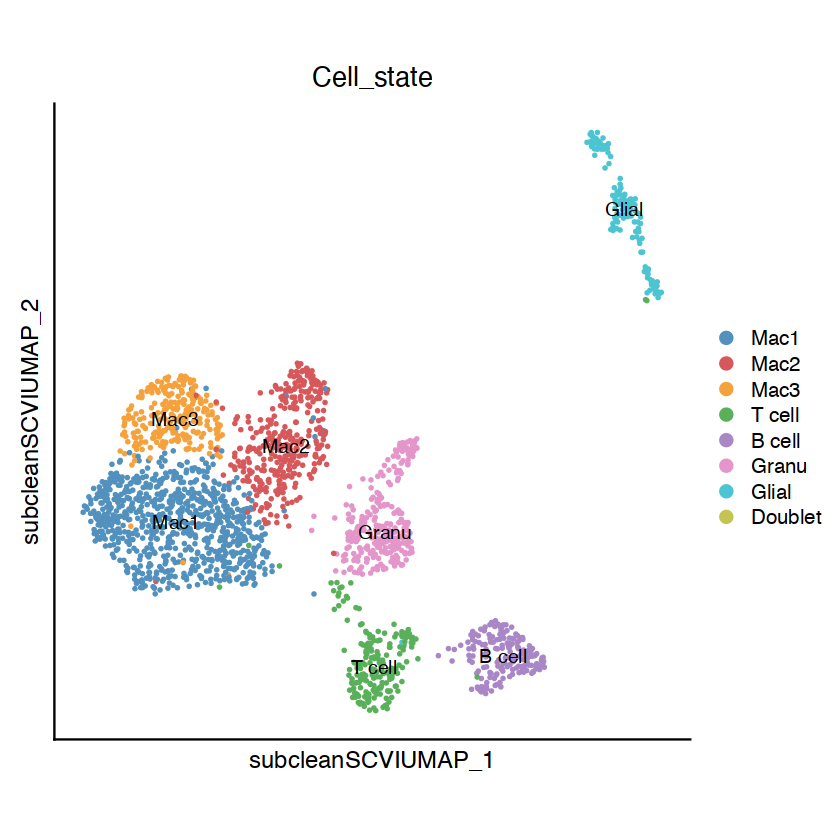

In [21]:
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', group.by = 'Cell_state', cols = mycol_10,  label = T)

In [22]:
PlotPDF('4.4.dim.all_cluster_annotated', 16, 8)
DimPlot2(sub.srt, reduction = 'sub_clean_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

Warning message:
"Removed 833 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_text()`)."


pdf 
  2